# TITANIC: Data Wrangling the Passenger Data
by Ayesha Baig


GA 2-11

## Exploratory Analysis with ```Pandas```

*This notebook is based on the Kaggle Competition training.csv.

For this excersise:
I was looking for the female survival rate based on the fare paid.
I acompolished this by using Pandas Dataframes. I have also included some plots for vizualizaions as well.


https://www.kaggle.com/c/titanic*

References:

https://pandas.pydata.org/pandas-docs/stable/reference/api


https://matplotlib.org/api/pyplot_api.html


https://seaborn.pydata.org/


https://plotly.com/python/bar-charts/



https://towardsdatascience.com/data-visualization-exploration-using-pandas-only-beginner-a0a52eb723d5

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

#!pip install plotly (need this to have plotly run first time when running notebook)
%matplotlib inline

## Load the Data

In [310]:
df = pd.read_csv("~/Developement/2-11/traintitanic.csv")
#any directory in home needs to be started with ""~/""shortcut

In [311]:
# Use pandas to view the first 10 rows of the file
df.head(10)
df.dropna() #drops the na for consistency

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


# Use pandas to get the summary statistics on the data

In [312]:
dfs = df.describe() #is limited, overview, general idea
dfs #this is the assigned variable for the df.describe


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [313]:
dfs.values #shows the values and printing

array([[8.91000000e+02, 8.91000000e+02, 8.91000000e+02, 7.14000000e+02,
        8.91000000e+02, 8.91000000e+02, 8.91000000e+02],
       [4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.96991176e+01,
        5.23007856e-01, 3.81593715e-01, 3.22042080e+01],
       [2.57353842e+02, 4.86592454e-01, 8.36071241e-01, 1.45264973e+01,
        1.10274343e+00, 8.06057221e-01, 4.96934286e+01],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 4.20000000e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.23500000e+02, 0.00000000e+00, 2.00000000e+00, 2.01250000e+01,
        0.00000000e+00, 0.00000000e+00, 7.91040000e+00],
       [4.46000000e+02, 0.00000000e+00, 3.00000000e+00, 2.80000000e+01,
        0.00000000e+00, 0.00000000e+00, 1.44542000e+01],
       [6.68500000e+02, 1.00000000e+00, 3.00000000e+00, 3.80000000e+01,
        1.00000000e+00, 0.00000000e+00, 3.10000000e+01],
       [8.91000000e+02, 1.00000000e+00, 3.00000000e+00, 8.00000000e+01,
        8.00000000e+00, 6

## Displays the names of the columns

In [314]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [315]:
dfs.values[0] #count of the items per columns

array([891., 891., 891., 714., 891., 891., 891.])

# Plotly Express

https://plotly.com/python/bar-charts/#stacked-bar-chart

There is a lot of values closer to zero in this dataset. That is why there is not much to see in the chart.

In [316]:

namez = [] ## create empty list 
for x in dfs.describe().columns: ## get column names
    namez.append(x)      ### append to a list namez 

ys = dfs.describe().values[1:] ### get all arrays of values except for the first which is count
x1 = dfs.describe().columns[3:]  
texts = ['mean', 'std', 'min', '25%', '50%', '75%', 'max'] ### we will use these labels to show information when hovering on the chart
fig = go.Figure() ### create an empty figure so that we can then append some data into it
for ll in range(0,len(texts)):
    fig.add_trace((go.Bar(x=x1,y=ys[ll-1], name=texts[ll],text=texts[ll],hoverinfo='text+y'))) ## add a new trace on hte graph for each of the columns 
fig.update_layout(barmode='group',title="Titanic Dataset <br> Using Decribe Data") ## call barmode as group

fig.show()

# Mean Age of All Passangers

In [317]:
df['Age'].mean()

29.69911764705882

 # Mean age in the 25 Percentile from the .describe

In [318]:
dfs['Age'].loc['25%']

20.125

In [319]:
df['Survived']==1 #gives us an output of the booleans

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [320]:
#mean age of who survived, this fileters each row. new dataframe where all the rows which are false
survived = df[df['Survived']==1]#list of all those who survived who is 1
survived
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [321]:
survived['Age'].mean()

28.343689655172415

In [322]:
#calculate not survived
notsurvived = df[df['Survived']==0]#list of all those who survived who is 0
notsurvived
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [323]:
notsurvived['Age'].mean()

30.62617924528302

# There is a 3 year Gap between the survive and not survived

In [324]:
female_survived = df[(df['Sex']=='female') & (df['Survived'] == 1)]#list of all those who survived and are Female
female_not_survived = df[(df['Sex']=='female') & (df['Survived'] == 0)]#list of all those females that did not survive
print(abs(female_not_survived['Age'].mean() - female_survived["Age"].mean()))



3.800840736040609


## As you can see above the difference in the females that survived and did not survive is 3.8 yrs gap
## As you can see above the difference in the males that survived and did not survive is 2.3 yrs gap


            Fare       Age    Pclass
Fare    1.000000  0.107617 -0.380813
Age     0.107617  1.000000 -0.392735
Pclass -0.380813 -0.392735  1.000000


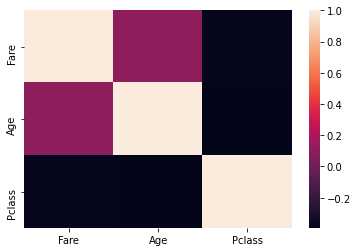

In [325]:
# for male who survived
df1 = df[df.Sex=='male'] 
df1 = df1[df1.Survived==1]
df1["Sex"] = df1.Sex.apply(lambda x: 1 if x=='male' else 0)#this is the application with the series.
corr = df1.loc[:,['Fare','Age', 'Pclass']].corr()
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr)
print(corr) 

# Correlation Plots for Fare, Age and Pclass for various combination of sex and survivals

            Fare       Age    Pclass
Fare    1.000000  0.191802 -0.625475
Age     0.191802  1.000000 -0.430578
Pclass -0.625475 -0.430578  1.000000


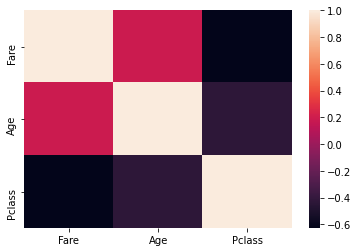

In [326]:
# for female who survived
df1 = df[df.Sex=='female'] 
df1 = df1[df1.Survived==1]
df1["Sex"] = df1.Sex.apply(lambda x: 1 if x=='male' else 0)
corr = df1.loc[:,['Fare','Age', 'Pclass']].corr()
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr)
print(corr) 

            Fare       Age    Pclass
Fare    1.000000  0.107983 -0.527486
Age     0.107983  1.000000 -0.447785
Pclass -0.527486 -0.447785  1.000000


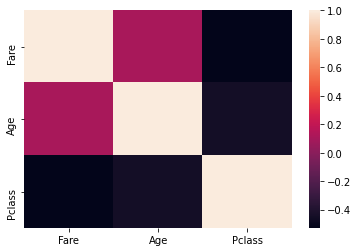

In [327]:
# for male who did not survived
df1 = df[df.Sex=='male'] 
df1 = df1[df1.Survived==0]
df1["Sex"] = df1.Sex.apply(lambda x: 1 if x=='male' else 0)
corr = df1.loc[:,['Fare','Age', 'Pclass']].corr()
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr)
print(corr) 

            Fare       Age    Pclass
Fare    1.000000 -0.149017 -0.555630
Age    -0.149017  1.000000 -0.161864
Pclass -0.555630 -0.161864  1.000000


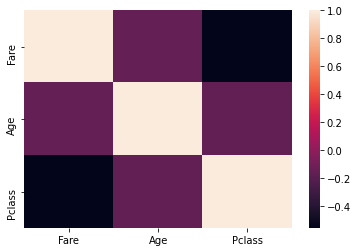

In [328]:
# for female who did not survived
df1 = df[df.Sex=='female'] 
df1 = df1[df1.Survived==0]
df1["Sex"] = df1.Sex.apply(lambda x: 1 if x=='male' else 0)
corr = df1.loc[:,['Fare','Age', 'Pclass']].corr()
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr)
print(corr) 

# Shows the Mean Fare paid by those who did not survive

In [329]:
notsurvived['Fare'].mean()

22.117886885245902

# Shows the Mean Fare Paid by Those who did survive

In [330]:
survived['Fare'].mean()

48.39540760233918